# **Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 6 End-of-course project: Build a machine learning model

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.  
<br/>   

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  
<br/>  

*This activity has three parts:*

**Part 1:** Ethical considerations 
* Consider the ethical implications of the request 

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, complete an Executive Summary using the questions listed on the PACE Strategy Document. 

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



# Build a machine learning model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?


2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a customer will give a tip, but they actually won't)?
  
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a customer will not give a tip, but they actually will)?  
  
  
3.   Do the benefits of such a model outweigh the potential problems?
  
4.   Would you proceed with the request to build this model? Why or why not?
 
5.   Can the objective be modified to make it less problematic?
 


1. I am being asked to build a machine learning model that predicts whether a customer will not leave a tip based on the provided data. The model will be used in an app to alert taxi drivers about customers who are unlikely to tip.

2. Ethical implications include potential discrimination or bias against certain groups of customers. If the model makes errors, it could lead to unfair treatment of customers, negatively affecting their experience and potentially harming the reputation of the taxi service. In this case `will not tip = true positive`
    - When the model predicts a false negative (i.e., predicts that a customer will give a tip, but they actually won't), the taxi drivers might provide good service or go above and beyond in the expectation of a tip. However, the customer does not leave a tip, potentially leading to disappointment and frustration on the driver's part.
    - When the model predicts a false positive (i.e., predicts that a customer will not give a tip, but they actually will), the drivers might provide subpar service or avoid interacting with the customer. However, the customer ends up leaving a tip, leading to a missed opportunity for the driver to provide good service and potentially a negative customer experience.

3. It's arguable. While the model might help drivers manage their expectations, the potential for discrimination, negative experiences, and conflicts raises serious concerns about its overall benefits.

4. Proceeding with the request requires careful consideration of the ethical implications and potential harm. It might be wiser to explore alternative ways to improve customer service and driver experiences without relying solely on a predictive model that could lead to unfair treatment.

5. Yes, the objective could be modified to focus on improving customer service, communication, and satisfaction for all customers, rather than singling out specific customers who might not tip.

Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  What features do you need to make this prediction?

2.  What would be the target variable?  

3.  What metric should you use to evaluate your model? Do you have enough information to decide this now?


1. **Features:**
   - Features related to the trip: trip distance, fare amount, payment type, trip duration, etc.
   - Features related to the customer: previous tipping behavior, customer rating, frequency of rides, etc.
   - Time-related features: day of the week, time of day, etc.

2. **Target Variable:**
   - The target variable would be binary: 
       - 1 (positive class) if the customer is predicted to tip 20% or more, and 
       - 0 (negative class) otherwise.

3. **Evaluation Metric:**
   - The choice of the evaluation metric depends on the business context and priorities. Since the goal is to predict generous tippers, we would likely want to focus on **precision**. Precision measures the proportion of predicted generous tippers that are actually generous tippers. A high precision means fewer false positives, which is important in this scenario to avoid mistakenly identifying customers as generous tippers when they are not.

   - However, we might also consider other metrics like recall, F1-score, and ROC-AUC depending on the trade-off between false positives and false negatives.

4. **Information Needed:**
   - To decide on the evaluation metric, we would need to know the business implications of false positives and false negatives. For example, if mistakenly labeling a non-generous tipper as generous has minimal impact but missing a genuinely generous tipper is costly, we might prioritize recall. Conversely, if avoiding mistaken identifications is more important, we'd prioritize precision.



**_Complete the following steps to begin:_**

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages and libraries
### YOUR CODE HERE import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

In [2]:
# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Begin by reading in the data. There are two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares from the previous course's project called nyc_preds_means.csv.

**Note:** `Pandas` reads in the dataset as `df0`, now inspect the first five rows. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THE CELL BELOW TO IMPORT YOUR DATA. 

# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

Inspect the first few rows of `df0`.


In [4]:
# Inspect the first few rows of df0
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Inspect the first few rows of `nyc_preds_means`.

In [5]:
# Inspect the first few rows of `nyc_preds_means`
nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


#### Join the two dataframes

Join the two dataframes using a method of your choice.

In [6]:
df0.shape, nyc_preds_means.shape

((22699, 18), (22699, 3))

In [7]:
# Merge datasets
df0 = pd.concat([df0, nyc_preds_means], axis=1)

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

Consider the questions in your PACE Strategy Documentto reflect on the Analyze stage.

### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. 

Call `info()` on the new combined dataframe.

In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

You know from your EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, you'll need to sample the data to select only the customers who pay with credit card. 

Copy `df0` and assign the result to a variable called `df1`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

In [9]:
# Subset the data to isolate only customers who paid by credit card
df1 = df0.copy()

mask = df1['payment_type'] == 1

df1 = df1[mask]

In [10]:
df1.shape

(15265, 21)

##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  


In [11]:
# Create tip % col
df1['tip_percent'] = round(df1['tip_amount']/ (df1['total_amount'] - df1['tip_amount']),3)
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200


Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [12]:
# Create 'generous' col (target)
df1['generous'] = df1['tip_percent'].copy()
df1['generous'] = np.where(df1['tip_percent'] >= 0.2, 1, 0)
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1


In [13]:
df1['generous'].value_counts()

1    8035
0    7230
Name: generous, dtype: int64

<details>
  <summary><h5>HINT</h5></summary>

To convert from Boolean to binary, use `.astype(int)` on the column.
</details>

#### Create day column

Next, you're going to be working with the pickup and dropoff columns.

Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [14]:
# Convert pickup and dropoff cols to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [15]:
# Create a 'day' col
#day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
#df1['day'] = df1['tpep_pickup_datetime'].dt.dayofweek.map(day_mapping).str.lower()

In [16]:
# or using
#df1['day'] = df1['tpep_pickup_datetime'].dt.day_name()

In [17]:
# or using 
df1['day'] = df1['tpep_pickup_datetime'].dt.strftime('%A').str.lower()
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,sunday
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,saturday



<details>
  <summary><h5>HINT</h5></summary>

To convert to day name, use `dt.day_name()` on the column.
</details>

#### Create time of day columns

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [18]:
am_mask = (df1['tpep_pickup_datetime'].dt.hour >= 6) & (df1['tpep_pickup_datetime'].dt.hour < 10)
day_mask = (df1['tpep_pickup_datetime'].dt.hour >= 10) & (df1['tpep_pickup_datetime'].dt.hour < 16)
pm_mask = (df1['tpep_pickup_datetime'].dt.hour >= 16) & (df1['tpep_pickup_datetime'].dt.hour < 20)
night_mask = (df1['tpep_pickup_datetime'].dt.hour >= 20) | (df1['tpep_pickup_datetime'].dt.hour < 6)

# Create 'am_rush' col
df1['am_rush'] = np.where(am_mask, 1, 0)

# Create 'daytime' col
df1['daytime'] = np.where(day_mask, 1, 0)

# Create 'pm_rush' col
df1['pm_rush'] = np.where(pm_mask, 1, 0)

# Create 'nighttime' col
df1['nighttime'] = np.where(night_mask, 1, 0)

<font color="green">**Note: My code is is so efficient that we don't need below lines.**</font>


You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [19]:
# Define 'am_rush()' conversion function [06:00–10:00)
    #==> ENTER YOUR CODE HERE

Now, apply the `am_rush()` function to the `am_rush` series to perform the conversion. Print the first five values of the column to make sure it did what you expected it to do.

**Note:** Be careful! If you run this cell twice, the function will be reapplied and the values will all be changed to 0.

In [20]:
# Apply 'am_rush' function to the 'am_rush' series
#==> ENTER YOUR CODE HERE

Write functions to convert the three remaining columns and apply them to their respective series.

In [21]:
# Define 'daytime()' conversion function [10:00–16:00)
#==> ENTER YOUR CODE HERE

In [22]:
# Apply 'daytime()' function to the 'daytime' series
#==> ENTER YOUR CODE HERE

In [23]:
# Define 'pm_rush()' conversion function [16:00–20:00)
#==> ENTER YOUR CODE HERE

In [24]:
# Apply 'pm_rush()' function to the 'pm_rush' series
#==> ENTER YOUR CODE HERE

In [25]:
# Define 'nighttime()' conversion function [20:00–06:00)
#==> ENTER YOUR CODE HERE

In [26]:
# Apply 'nighttime' function to the 'nighttime' series
#==> ENTER YOUR CODE HERE

#### Create `month` column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

<details>
  <summary><h5>HINT</h5></summary>

Refer to the [strftime cheatsheet](https://strftime.org/) for help.
</details>

In [27]:
# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.month_name().str[:3].str.lower()

In [28]:
# or use
#df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

Examine the first five rows of your dataframe.

In [29]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,saturday,0,0,0,1,mar


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [30]:
# Drop columns
df = df1.drop(
    [
        'Unnamed: 0', 
        'tpep_pickup_datetime', 
        'tpep_dropoff_datetime',
        'payment_type', 
        'trip_distance', 
        'tip_amount', 
        'tip_percent', 
        'total_amount', 
        'store_and_fwd_flag', 
        'extra', 
        'mta_tax', 
        'tolls_amount', 
        'improvement_surcharge',
        'fare_amount'
    ], axis=1
)
df.head()

,VendorID,passenger_count,RatecodeID,PULocationID,DOLocationID,mean_duration,mean_distance,predicted_fare,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,2,6,1,100,231,22.847222,3.521667,16.434245,1,saturday,1,0,0,0,mar
1,1,1,1,186,43,24.470370,3.108889,16.052218,1,tuesday,0,1,0,0,apr
2,1,1,1,262,236,7.250000,0.881429,7.053706,0,friday,1,0,0,0,dec
3,2,1,1,188,97,30.250000,3.700000,18.731650,1,sunday,0,1,0,0,may
5,2,6,1,161,236,11.855376,2.052258,10.441351,1,saturday,0,0,0,1,mar


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int32  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int32  
 11  daytime          15265 non-null  int32  
 12  pm_rush          15265 non-null  int32  
 13  nighttime        15265 non-null  int32  
 14  month            15265 non-null  object 
dtypes: float64(3), int32(5), int64(5), object(2)
memory usage: 1.6+ MB


#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [32]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convert each column to string
for col in cols_to_str:
    df[col] = df[col].astype(str)

In [33]:
df.select_dtypes(include=['object']).nunique()

VendorID          2
RatecodeID        6
PULocationID    124
DOLocationID    193
day               7
month            12
dtype: int64


<details>
  <summary><h5>HINT</h5></summary>

To convert to string, use `astype(str)` on the column.
</details>

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [34]:
# Convert categoricals to binary
df2 = pd.get_dummies(df, drop_first=True)

In [35]:
df2.info(), df2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Columns: 347 entries, passenger_count to month_sep
dtypes: float64(3), int32(5), int64(1), uint8(338)
memory usage: 5.8 MB


(None, (15265, 347))

##### Evaluation metric

Before modeling, you must decide on an evaluation metric. 

1. Examine the class balance of your target variable. 

In [36]:
# Get class balance of 'generous' col
df2['generous'].value_counts(normalize=True)

1    0.526368
0    0.473632
Name: generous, dtype: float64

Approximately nearlyt 53% of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is not imbalanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

**False positives are worse for cab drivers,** because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

**False negatives are worse for customers,** because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

Answer: 

The metric that weighs both precision and recall equally is the **F1 score**. The F1 score is the harmonic mean of precision and recall, providing a balanced assessment of a model's performance in terms of both false positives and false negatives. It considers both types of errors and is particularly useful when the stakes are relatively even, as it aims to find a balance between correctly identifying positive cases and minimizing false positives.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [37]:
# Isolate target variable (y)
y = df2['generous'].copy()

# Isolate the features (X)
X = df2.drop('generous', axis=1).copy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2, 
                                                    random_state=42)

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a dictionary `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>
 


In [38]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
params = {
    'max_depth': [None, 5, 10],              # Maximum depth of the individual trees
    'max_features': ['auto', 'sqrt', 0.5],   # Maximum number of features considered for splitting a node
    'max_samples': [None, 0.5, 0.9],         # Maximum number of samples used for fitting each tree
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'n_estimators': [50, 100, 200]           # Number of trees in the forest
}

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, 
                     param_grid=params, 
                     scoring=scoring, 
                     cv=5, 
                     n_jobs=-1, 
                     refit='f1')

Now fit the model to the training data. Note that, depending on how many options you include in your search grid and the number of cross-validation folds you select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time. 

In [39]:
%%time

rf_cv.fit(X_train, y_train)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1215 fits failed out of a total of 3645.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
466 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\ut

CPU times: total: 25.1 s
Wall time: 37min 23s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 0.5],
                         'max_samples': [None, 0.5, 0.9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

<details>
  <summary><h5>HINT</h5></summary>

If you get a warning that a metric is 0 due to no predicted samples, think about how many features you're sampling with `max_features`. How many features are in the dataset? How many are likely predictive enough to give good predictions within the number of splits you've allowed (determined by the `max_depth` hyperparameter)? Consider increasing `max_features`.

</details>

If you want, use `pickle` to save your models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [45]:
import pickle 

# Define a path to the folder where you want to save the model
path = 'D:/1 DA Courses/2 Google Advanced Data Analytics - Coursera/Course 6 The Nuts and Bolts of Machine Learning/Week 5 Assessment/Automatidata/'

In [46]:
model_name = 'best_rf_model'

In [47]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [48]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [50]:
write_pickle(path, rf_cv, model_name)

In [51]:
# Load the trained GridSearchCV object
loaded_rf_cv = read_pickle(path, model_name)

# Now you can use the loaded_rf_cv object just like any other GridSearchCV object


Examine the best average score across all the validation folds. 

In [57]:
# Examine best score
rf_cv.best_score_

0.7518562706844787

Examine the best combination of hyperparameters.

In [56]:
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 0.5,
 'max_samples': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

<details>
  <summary><h5>HINT</h5></summary>

To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

</details>

In [58]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Call `make_results()` on the GridSearch object.

In [67]:
result1 = make_results('Tuned Random Forest CV', rf_cv, 'accuracy')
result1

,model,precision,recall,F1,accuracy
0,Tuned Random Forest CV,0.696253,0.817184,0.751833,0.714135


A model with such low F1, precision, and recall scores is not good enough. Optional: try to improve the scores. Generally, unless your hyperparameter search space is completely off the mark, you won't get the degree of improvement you need to approve this model. However, it's worth trying, especially to practice searching over different hyperparameters.

<details>
  <summary><h5>HINT</h5></summary>

For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.
</details>

Use your model to predict on the test data. Assign the results to a variable called `preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

Answer:

The benefit of using multiple models to predict on the test data is that you can compare models using data that was not used to train/tune hyperparameters. This reduces the risk of selecting a model based on how well it fit the training data.

The drawback of using the final test data to select a model is that, by using the unseen data to make a decision about which model to use, you no longer have a truly unbiased idea of how your model would be expected to perform on new data. In this case, think of final model selection as another way of "tuning" your model.

In [65]:
# Get scores on test data
preds = rf_cv.predict(X_test)

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [66]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [70]:
 # Get scores on test data
result2 = get_test_scores('Tuned Random Forest CV (Test)', preds, y_test)
result = pd.concat([result1, result2], axis=0)
result

,model,precision,recall,F1,accuracy
0,Tuned Random Forest CV,0.696253,0.817184,0.751833,0.714135
0,Tuned Random Forest CV (Test),0.673611,0.806266,0.733993,0.700622


**Question:** How do your test results compare to your validation results?

The test results are slightly lower than the validation results for all metrics (precision, recall, F1, and accuracy). This is a common observation and can be attributed to the fact that the model was tuned and optimized based on the validation set. As a result, the model might have slightly overfit to the validation set during the tuning process, leading to better performance on the validation set compared to the unseen test set.

Even though the test scores are slightly lower, the overall performance of the model on the test set is still good compared to the training model.

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [71]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(random_state=42, objective='binary:logistic')

# 2. Create a dictionary of hyperparameters to tune
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 5, 10],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}

# 3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, 
                      param_grid=params, 
                      scoring=scoring, 
                      n_jobs=-1, 
                      cv=5, 
                      refit='f1')

Now fit the model to the `X_train` and `y_train` data.

In [72]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 22.3 s
Wall time: 15min 46s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 200, 300]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Get the best score from this model.

In [73]:
# Examine best score
xgb_cv.best_score_

0.7518549670456254

And the best parameters.

In [74]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 10,
 'n_estimators': 100}

XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [81]:
# Call 'make_results()' on the GridSearch object
result3 = make_results('Tuned XGBoost CV', xgb_cv, 'accuracy')
result3

,model,precision,recall,F1,accuracy
0,Tuned XGBoost CV,0.69606,0.817493,0.751855,0.714053


Use your model to predict on the test data. Assign the results to a variable called `preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

In [82]:
# Get scores on test data
preds = xgb_cv.predict(X_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [83]:
# Get scores on test data
result4 = get_test_scores('Tuned XGBoost CV (Test)', preds, y_test)
result4

,model,precision,recall,F1,accuracy
0,Tuned XGBoost CV (Test),0.673251,0.806266,0.733779,0.700295


In [84]:
result = pd.concat([result, result3, result4], axis=0)
result

,model,precision,recall,F1,accuracy
0,Tuned Random Forest CV,0.696253,0.817184,0.751833,0.714135
0,Tuned Random Forest CV (Test),0.673611,0.806266,0.733993,0.700622
0,Tuned XGBoost CV,0.696060,0.817493,0.751855,0.714053
0,Tuned XGBoost CV (Test),0.673251,0.806266,0.733779,0.700295


**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

Overall, the tuned random forest model has slightly better performance than the XGBoost model. However, the difference in performance is not significant. If I had to choose one model, I would choose the tuned random forest model because it has slightly better performance on the test set.

Plot a confusion matrix of the model's predictions on the test data.

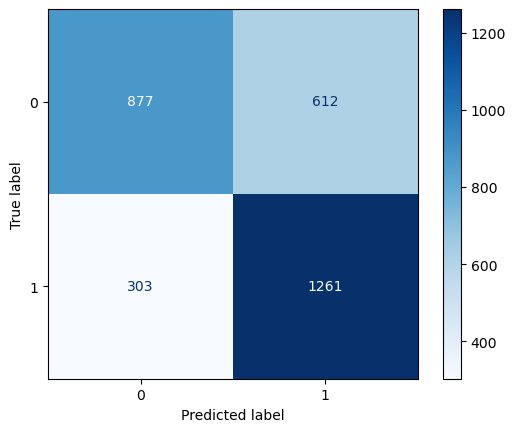

In [88]:
best_rf_model = rf_cv.best_estimator_

# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix
plot = ConfusionMatrixDisplay(cm, display_labels=best_rf_model.classes_)
plot.plot(cmap='Blues', values_format='d');

**Question:** What type of errors are more common for your model?

**False Positives** is more common with our model, double as **False Negatives**, meaning Type I error is prevailing.

Our model is more prone to **False Positives** (predicting a generous tip when it's actually not), it means it's often predicting positive outcomes that turn out to be incorrect. This could lead to potential misunderstandings or dissatisfaction among taxi drivers if they expect larger tips based on the model's prediction.

##### **Feature importance**

Use the `plot_importance` function to inspect the top 10 most important features of your final model.

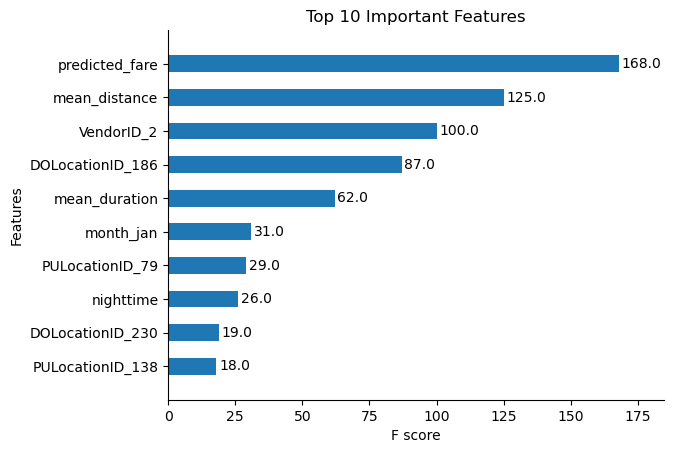

In [95]:
plot_importance(xgb_cv.best_estimator_, 
                title='Top 10 Important Features', 
                max_num_features=10, 
                grid=False, 
                height=0.5)
sns.despine();

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**  
→ No, the accuracy of the model is still not so high. For me, at least, 85% accuracy would be good enough and I want to balance between FP and FN. In this model, accuracy using Random Forest and XGBoost is only 70% and there are a lot of of predictive variables (more than 300) so PCA is needed to lower the dimensitivity of the model.
2. **What was your model doing? Can you explain how it was making predictions?**   
→ Unfortunately, XGBoost is not the most transparent machine learning algorithm. We know that `predicted_fare`, `mean_duration`, and `mean_distance` are the most important features, but we don't know how they influence tipping. This would require further exploration.
3. **Are there new features that you can engineer that might improve model performance?**   
→ There are almost always additional features that can be engineered, but hopefully the most obvious ones were generated during the first round of modeling. In our case, we could try creating three new columns that indicate if the trip distance is short, medium, or far. We could also engineer a column that gives a ratio that represents (the amount of money from the fare amount to the nearest higher multiple of $5) / fare amount. For example, if the fare were \\$12, the value in this column would be 0.25, because \\$12 to the nearest higher multiple of \\$5 (\\$15) is \\$3, and \\$3 divided by \\$12 is 0.25. The intuition for this feature is that people might be likely to simply round up their tip, so journeys with fares with values just under a multiple of \\$5 may have lower tip percentages than those with fare values just over a multiple of \\$5. We could also do the same thing for fares to the nearest \\$10.

4. **What features would you want to have that would likely improve the performance of your model?**   
→ It would probably be very helpful to have past tipping behavior for each customer. It would also be valuable to have accurate tip values for customers who pay with cash. It would be helpful to have a lot more data. With enough data, we could create a unique feature for each pickup/dropoff combination.

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. Even if you cannot use the model to make strong predictions, was the work done in vain? Consider any insights that you could report back to stakeholders.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.